## Assignment Data Cleaning 3

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?
2. If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.
3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.
4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.
5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?
6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
%matplotlib inline

In [2]:
PATH = r'C:\Users\latee\Downloads\states_all.csv'
US_EDU = pd.read_csv(PATH)

In [33]:
US_EDU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

We fill in the missing values using interpolation since our data is a time series data:

In [36]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = US_EDU["STATE"].unique()

for state in states:
    US_EDU.loc[US_EDU["STATE"] == state, fill_list] = US_EDU.loc[US_EDU["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
US_EDU.dropna(inplace=True)

In [47]:
US_EDU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 204 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     466 non-null object
STATE                           466 non-null object
YEAR                            466 non-null int64
ENROLL                          466 non-null float64
TOTAL_REVENUE                   466 non-null float64
FEDERAL_REVENUE                 466 non-null float64
STATE_REVENUE                   466 non-null float64
LOCAL_REVENUE                   466 non-null float64
TOTAL_EXPENDITURE               466 non-null float64
INSTRUCTION_EXPENDITURE         466 non-null float64
SUPPORT_SERVICES_EXPENDITURE    466 non-null float64
OTHER_EXPENDITURE               466 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      466 non-null float64
GRADES_PK_G                     466 non-null float64
GRADES_KG_G                     466 non-null float64
GRADES_4_G                      466 non-null float64
GRADES_8_G                      466 non-null flo

## Assignments - Data Cleaning 3.1

Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

Text(0.5, 1.0, 'Box plot of total expenditure')

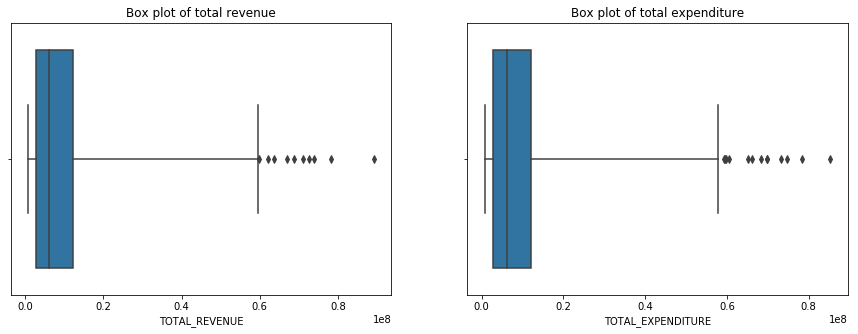

In [45]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(US_EDU["TOTAL_REVENUE"], whis = 5)
plt.title("Box plot of total revenue")

plt.subplot(1,2,2)
sns.boxplot(US_EDU["TOTAL_EXPENDITURE"], whis = 5)
plt.title("Box plot of total expenditure")

Both variables have outliers

## Assignment 3.2 - Data Cleaning 

If you detect outliers in the *TOTAL_REVENUE* and *TOTAL_EXPENDITURE* variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [42]:
winsorized_revenue = winsorize(US_EDU["TOTAL_REVENUE"], (0, 0.05))

winsorized_expenditure = winsorize(US_EDU["TOTAL_EXPENDITURE"], (0, 0.05))

Text(0.5, 1.0, 'Box plot of total expenditure winsorized')

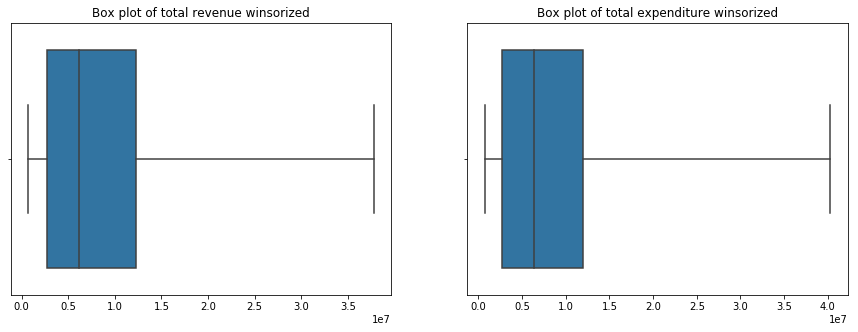

In [43]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(winsorized_revenue, whis = 5)
plt.title("Box plot of total revenue winsorized")

plt.subplot(1,2,2)
sns.boxplot(winsorized_expenditure, whis = 5)
plt.title("Box plot of total expenditure winsorized")

## Assignment 3.3 - Data Cleaning 

Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [49]:
budget_deficit = US_EDU.TOTAL_REVENUE - US_EDU['TOTAL_EXPENDITURE']

Text(0.5, 1.0, 'Box plot of budget deficit')

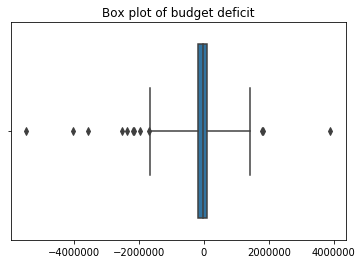

In [56]:
sns.boxplot(budget_deficit, whis = 5)
plt.title("Box plot of budget deficit")

There are outliers on both ends

In [53]:
winsorized_budget = winsorize(budget_deficit, (0.05, 0.05))

Text(0.5, 1.0, 'Box plot of budget deficit')

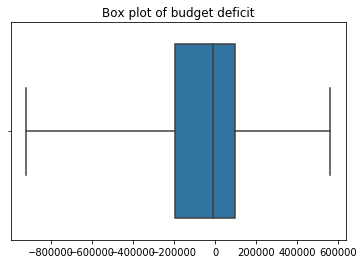

In [58]:
sns.boxplot(winsorized_budget, whis = 5)
plt.title("Box plot of budget deficit")

Outliers are now gone 

## Assignment 3.4 - Data Cleaning

Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.

In [64]:
budget_deficit2 = winsorized_revenue - winsorized_expenditure 

Text(0.5, 1.0, 'Total Expenditure')

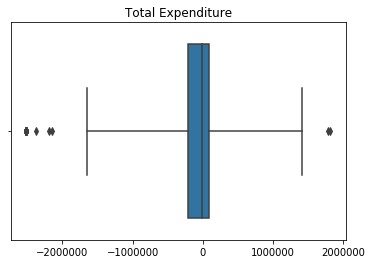

In [66]:
sns.boxplot(budget_deficit2 , whis=5)
plt.title('Total Expenditure')

In [67]:
winsorized_budget2 = winsorize(budget_deficit2, (0.05, 0.05))

Text(0.5, 1.0, 'Total Expenditure')

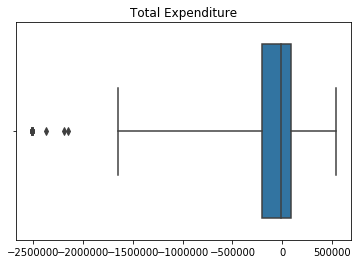

In [68]:
sns.boxplot(winsorized_budget2 , whis=5)
plt.title('Total Expenditure')

We successfully eliminated many of the outliers. If we increase the lower bound of the winsorization, the remaining few ones also would be eliminated but for consistency with the analysis above, we keep winsorizing the values using 5% as the threshold percentiles at both ends.

## Assignment 3.5 - Data Cleaning 

Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [69]:
pd.DataFrame({"original_budget": budget_deficit, "winsorized_budget1": winsorized_budget,
              "winsorized_budget2": winsorized_budget2}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.660000e+02,466.000000,4.660000e+02
mean,-1.549769e+05,-61210.328326,-1.736360e+05
std,6.803253e+05,342588.030357,6.502740e+05
min,-2.518429e+06,-921134.000000,-2.518429e+06
25%,-2.047750e+05,-196574.750000,-2.047750e+05
50%,-1.460050e+04,-12823.500000,-1.460050e+04
75%,9.184800e+04,98523.500000,9.184800e+04
max,1.816932e+06,560511.000000,5.400550e+05


#### Is it an industry standard to winsorize inputs into a new variable or is this a case by case basis?

The second winsorized budget more closely represents the original budget in mean and std. This implies that the outlier elimination strategy is critical to determining what our data will look like once cleaned. 

Depends but, yes checking your boxes and seeing what makes the most sense

## Assignment 3.6 - Data Cleaning 

If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

Based on our results I would say the method used to respond to the fourth question would be more appropreaite. That method still closely represents what the orginal budget would look like, just without the outliers. 